<a href="https://colab.research.google.com/github/narekmi/MachineLearning/blob/main/Assignment4_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt


In [22]:
np.random.seed(42)

# 80 random points with 2 features (x and y coordinates)
data_points = np.random.randn(80, 2)

noise = 0.1 * np.random.randn(80)  #noise addition
distances = data_points[:, 0]**2 + data_points[:, 1]**2 + noise
labels = distances < 1.2  # Label points inside the circle as True (1), outside as False (0)
labels = labels.astype(int)  # boolean labels to integers (0 or 1)


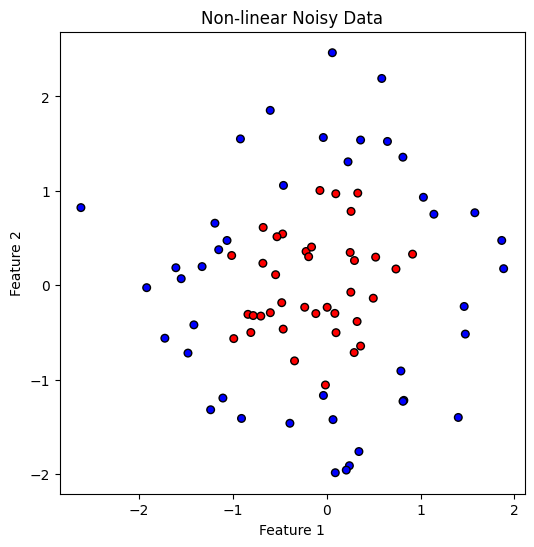

In [13]:
# Visualization part
plt.figure(figsize=(6, 6))
plt.scatter(data_points[:, 0], data_points[:, 1], c=labels, cmap="bwr", edgecolor="k", s=30)
plt.title("Non-linear Noisy Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [15]:
# Test and train split part (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    data_points, labels, test_size=0.3, random_state=42
)

In [16]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

In [17]:
# Hard Margin SVM
svm_hard_margin = SVC(kernel="linear", C=1e10)  # Very high C for a hard margin
svm_hard_margin.fit(X_train, y_train)
hard_margin_predictions = svm_hard_margin.predict(X_test)

In [18]:
# Soft Margin SVM  with RBF Kernel
svm_soft_margin = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_soft_margin.fit(X_train, y_train)
soft_margin_predictions = svm_soft_margin.predict(X_test)

In [19]:
print("Accuracy Scores:")
print(f"Logistic Regression: {accuracy_score(y_test, logistic_predictions):.2f}")
print(f"Hard Margin SVM: {accuracy_score(y_test, hard_margin_predictions):.2f}")
print(f"Soft Margin SVM: {accuracy_score(y_test, soft_margin_predictions):.2f}")

Accuracy Scores:
Logistic Regression: 0.17
Hard Margin SVM: 0.25
Soft Margin SVM: 1.00


In [20]:
def plot_decision_boundary(model, X, y, title):
    #grid of points in the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    #grid points using np.meshgrid
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    #the labels for the grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="bwr")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k", s=30)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

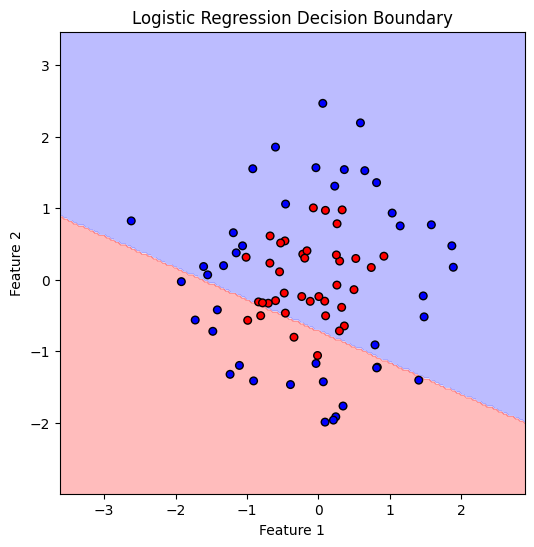

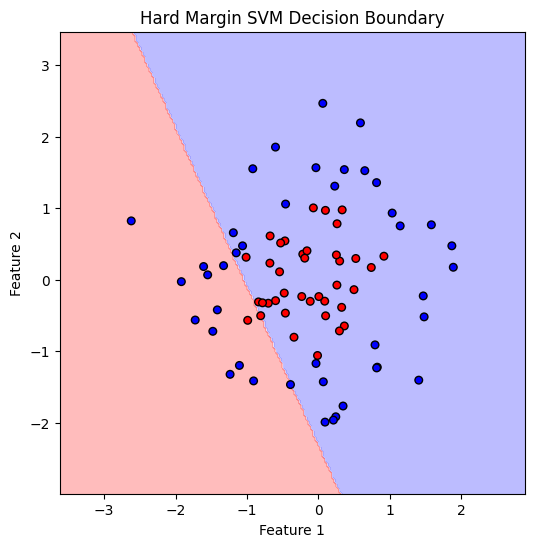

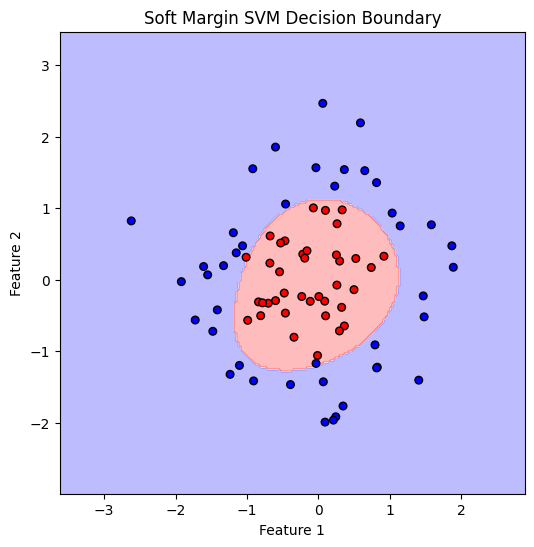

In [21]:
plot_decision_boundary(logistic_model, data_points, labels, "Logistic Regression Decision Boundary")
plot_decision_boundary(svm_hard_margin, data_points, labels, "Hard Margin SVM Decision Boundary")
plot_decision_boundary(svm_soft_margin, data_points, labels, "Soft Margin SVM Decision Boundary")